<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/learned_image_compression/blob/main/notebooks/01__one_layer_AE_MNIST__v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Simple AutoEncoder (no convolutional layers)
# https://blog.keras.io/building-autoencoders-in-keras.html
# https://www.youtube.com/watch?v=wECwVBmPH7w

       input                           output
    +---------+                      +---------+
    | 28x28x1 |                      | 28x28x1 |
    +---------+                      +---------+
         | flatten()                      ^ reshape(28, 28, 1)
         v                                |
     +-------+ dense() +----+ dense() +-------+
     | 28*28 |-------->| 32 |-------->| 28*28 |
     +-------+         +----+         +-------+
                     code layer
    <----------------------->
           encoder             decoder
                       <---------------------->

In [2]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [5]:
encoding_dim = 32
img_height = x_train[0].shape[0]
img_width = x_train[0].shape[1]
img_pixels = img_width*img_height
print(img_pixels)

784


In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
input_img = keras.Input(shape=(img_pixels,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)
#encoded = layers.Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(img_pixels, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_img, decoded)

In [9]:
encoder = keras.Model(input_img, encoded)

In [10]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
938/938 [==============================] - 11s 8ms/step - loss: 0.1916 - val_loss: 0.1329
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1193 - val_loss: 0.1077
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1035 - val_loss: 0.0981
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0977 - val_loss: 0.0950
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0958 - val_loss: 0.0939
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0950 - val_loss: 0.0931
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0945 - val_loss: 0.0929
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0941 - val_loss: 0.0926
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0939 - val_loss: 0.0925
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - val_loss: 0.092

In [14]:
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


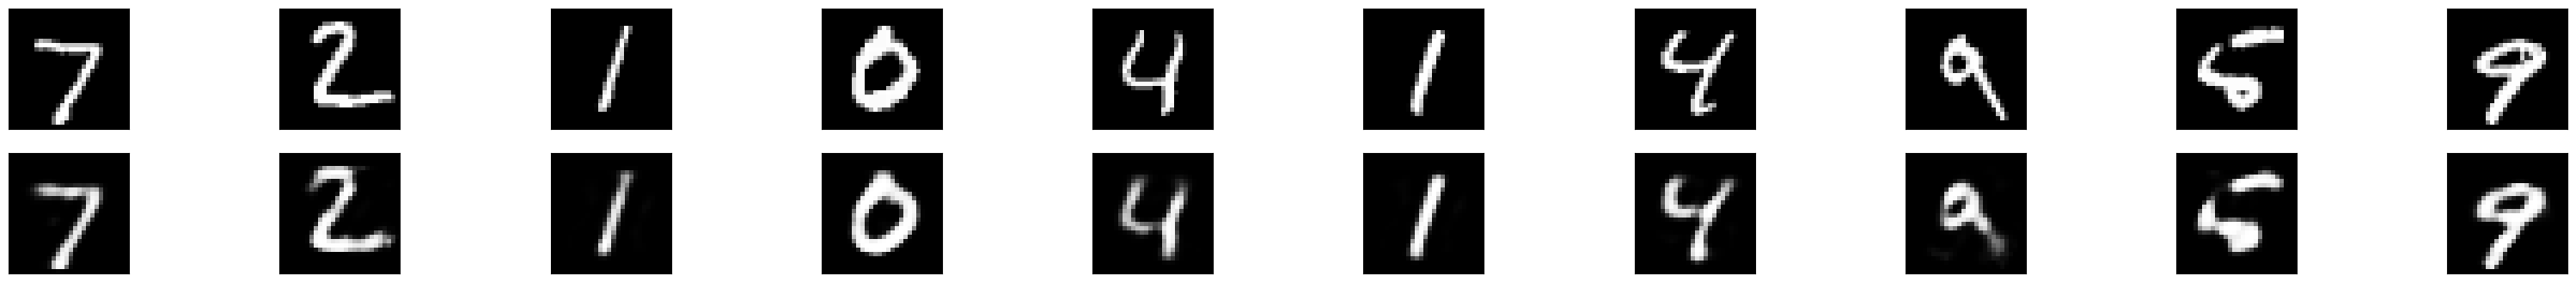

In [16]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(40,4))
for i in range(n):
  # original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(img_height, img_width))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(img_height, img_width))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()